# Laboratorio n° 1 - Circuito 3

Se tiene el siguiente circuito (Rectificador de precisión) para realiza el cálculo.


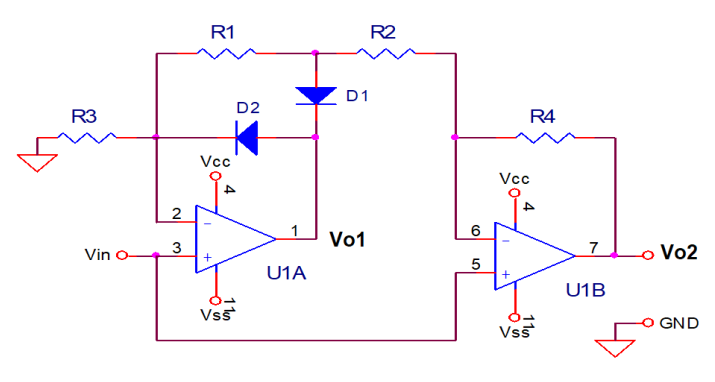

In [1]:
from IPython.display import Image

Image(filename= "img/Circuito 3.png")

### Caso 1

In [2]:
import sympy as sym
Vin, Vo, R1, R2, R3, R4= sym.symbols('V_{in}, V_{o}, R_{1}, R_{2}, R_{3}, R_{4}')
Vo1, Vo2= sym.symbols('V_{o1}, V_{o2}')
# Ecuación 1
equ_Vo= sym.Eq(Vo/R4, -Vin/(R1+R2)) 
sym.pprint(equ_Vo)

# Valores considerando tolerancia.
Rp= 10e3
#Rp= 10e3+(10e3/100)   # +1%    
#Rp= 10e3-(10e3/100)   # -1%

Rpp= 5e3
#Rpp= 5e3+(5e3/100)   # +1%
#Rpp= 5e3-(5e3/100)   # -1%

equ_Vo1= sym.solve(equ_Vo, Vo)
solucion1= sym.Eq(Vo1, equ_Vo1[0].subs({R1:Rp, R3:Rp, R4:Rp, R2:Rpp}))
solucion1

V_{o}      -V_{in}   
───── = ─────────────
R_{4}   R_{1} + R_{2}


Eq(V_{o1}, -0.666666666666667*V_{in})

Se pasiva la tensión en el nodo 6.

In [3]:
equ_Vin= sym.Eq(Vo, Vin*(R1+R2+R4)/(R1+R2))

solucion2= sym.Eq(Vo2, equ_Vin.rhs.subs({R1:Rp, R3:Rp, R4:Rp, R2:Rpp}))
solucion2

Eq(V_{o2}, 1.66666666666667*V_{in})

Resultado de la superposición.

In [4]:
solucion_1= sym.Eq(Vo, solucion1.rhs+solucion2.rhs)
solucion_1

Eq(V_{o}, 1.0*V_{in})

### Caso 2

Condiciones bla bla

In [5]:
equ_Vin= sym.Eq(Vin, Vo*R2/(R2+R4))

equ_Vo= equ_Vin.subs({R1:Rp, R3:Rp, R4:Rp, R2:Rpp})
solucion= sym.solve(equ_Vo, Vo)
s1= sym.Eq(Vo, solucion[0])

Resultado de la superposicion

In [6]:
Vob= sym.symbols('V_{oB}')

equ_Vob= sym.Eq(Vob/R2, -Vo/R4)

sVob= sym.solve(equ_Vob.subs({R1:Rp, R3:Rp, R4:Rp, R2:Rpp}), Vo)
equ= sym.Eq(Vo, sVob[0])
equ

Eq(V_{o}, -2.0*V_{oB})

La salida $V_{oB}$ se obtiene planteando el divisor de tensión del amplificador U1B:

In [7]:
equ_Vin= sym.Eq(Vin, Vob*R3/(R1+R3))
equ_Vob= equ_Vin.subs({R1:Rp, R3:Rp, R4:Rp, R2:Rpp})
equ1= sym.solve(equ_Vob, Vob)

# Reemplazo
s2= equ.subs(Vob, equ1[0])

Solución

In [8]:
sym.Eq(Vo, s1.rhs+s2.rhs)

Eq(V_{o}, -1.0*V_{in})